In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(color_codes=True)
from sklearn.metrics import accuracy_score
from numpy import loadtxt

In [3]:
data=pd.read_excel("Copy of electricity data for data analysis.xlsx")

In [4]:
data.head()

,Date,Time,Hour,Weekday,Is Working Day,SDSH Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price
0,2020-01-08,12:00:00,1,4,7,2475.68,2479.45,1383.7,-100.7,3654.911667,2473.00,1837.47,2296.059524
1,2020-01-08,01:00:00,2,4,7,2484.40,2494.00,1339.3,-44.4,3655.023333,2459.38,1434.83,2299.858393
2,2020-01-08,02:00:00,3,4,7,2486.89,2474.85,1309.4,-29.9,3656.065833,2370.61,1498.33,2306.105833
3,2020-01-08,03:00:00,4,4,7,2533.42,2478.66,1294.7,-14.7,3660.910833,2021.43,1462.42,2311.990119
4,2020-01-08,04:00:00,5,4,7,2850.75,2809.63,1361.4,66.7,3682.243750,2176.48,1455.85,2318.365119


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            7584 non-null   datetime64[ns]
 1   Time            7584 non-null   object        
 2   Hour            7584 non-null   int64         
 3   Weekday         7584 non-null   int64         
 4   Is Working Day  7584 non-null   int64         
 5   SDSH Price      7584 non-null   float64       
 6   SDSH DAP        7584 non-null   float64       
 7   SDSH Volume     7584 non-null   float64       
 8   Sgn0 VolumeDir  7584 non-null   float64       
 9   P24HA Price     7584 non-null   float64       
 10  PDSH Price      7584 non-null   float64       
 11  PWSH Price      7584 non-null   float64       
 12  PWA Price       7584 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(3), object(1)
memory usage: 770.4+ KB


<AxesSubplot:ylabel='Frequency'>

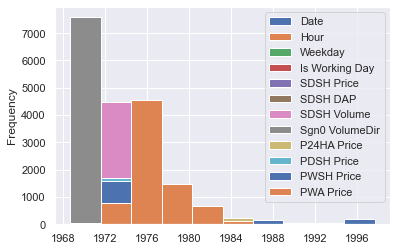

In [24]:
data.plot.hist()

In [7]:
#sns.pointplot(data['Is Working Day'],data['SDSH Price'],data['SDSH DAP'],data['Sgn0 VolumeDir'],data['P24HA Price'],data['PDSH Price'],data['PWSH Price'],data['PWA Price'])

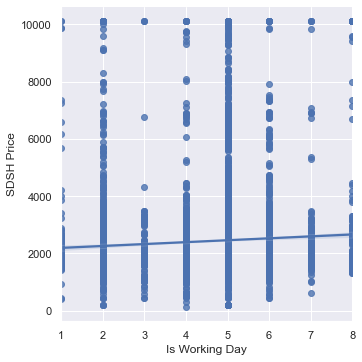

In [8]:
sns.lmplot(x='Is Working Day',y='SDSH Price',data=data)

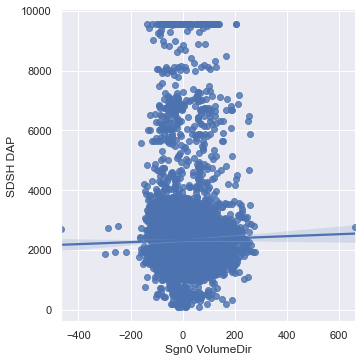

In [9]:
sns.lmplot(x='Sgn0 VolumeDir',y='SDSH DAP',data=data)

C:\Users\M.SOHAIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


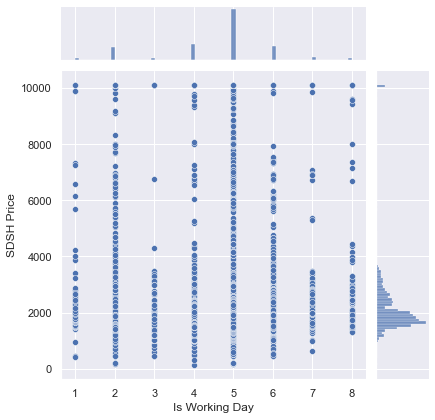

In [10]:
sns.jointplot(data['Is Working Day'],data['SDSH Price'])

C:\Users\M.SOHAIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


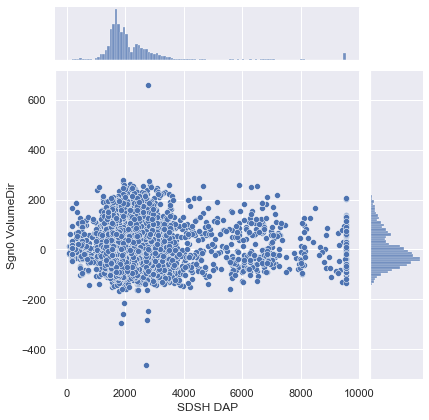

In [11]:
sns.jointplot(data['SDSH DAP'],data['Sgn0 VolumeDir'])

C:\Users\M.SOHAIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


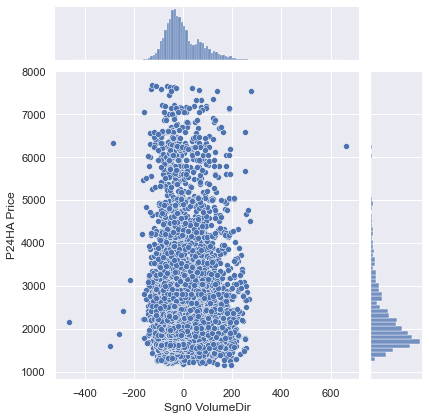

In [12]:
sns.jointplot(data['Sgn0 VolumeDir'],data['P24HA Price'])

C:\Users\M.SOHAIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


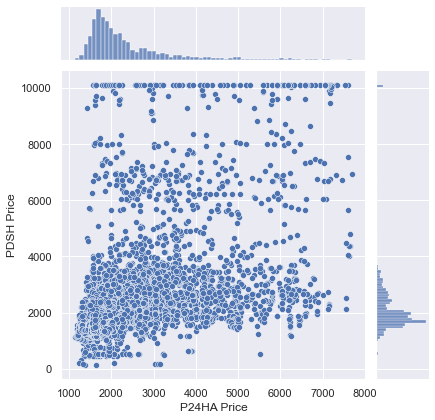

In [13]:
sns.jointplot(data['P24HA Price'],data['PDSH Price'])

In [48]:
data=data.drop('Time',axis=1)

In [58]:
y=data['PDSH Price']

In [59]:
X=data.drop('PDSH Price',axis=1)

<AxesSubplot:ylabel='Frequency'>

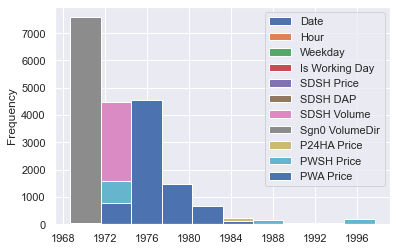

In [60]:
#x.info()
X.plot.hist()

In [61]:
#from sklearn.cross_validation import train_test_split
seed=7
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=seed)

In [62]:
from xgboost import XGBRegressor

In [63]:
hr_pred = XGBRegressor.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C')).predict(X_test._get_numeric_data())
print(classification_report(y_test, hr_pred))

TypeError: fit() missing 1 required positional argument: 'y'

In [67]:
model = XGBRegressor()
model.fit(X_train,y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.Date

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            7584 non-null   datetime64[ns]
 1   Hour            7584 non-null   int64         
 2   Weekday         7584 non-null   int64         
 3   Is Working Day  7584 non-null   int64         
 4   SDSH Price      7584 non-null   float64       
 5   SDSH DAP        7584 non-null   float64       
 6   SDSH Volume     7584 non-null   float64       
 7   Sgn0 VolumeDir  7584 non-null   float64       
 8   P24HA Price     7584 non-null   float64       
 9   PDSH Price      7584 non-null   float64       
 10  PWSH Price      7584 non-null   float64       
 11  PWA Price       7584 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(3)
memory usage: 711.1 KB


In [69]:
data.drop('Date',axis=1)

,Hour,Weekday,Is Working Day,SDSH Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price
0,1,4,7,2475.68,2479.45,1383.7,-100.7,3654.911667,2473.00,1837.47,2296.059524
1,2,4,7,2484.40,2494.00,1339.3,-44.4,3655.023333,2459.38,1434.83,2299.858393
2,3,4,7,2486.89,2474.85,1309.4,-29.9,3656.065833,2370.61,1498.33,2306.105833
3,4,4,7,2533.42,2478.66,1294.7,-14.7,3660.910833,2021.43,1462.42,2311.990119
4,5,4,7,2850.75,2809.63,1361.4,66.7,3682.243750,2176.48,1455.85,2318.365119
...,...,...,...,...,...,...,...,...,...,...,...
7579,20,4,5,1453.59,1886.14,1892.6,-23.4,1624.207917,1584.67,1303.85,1442.281607
7580,21,4,5,1463.07,1358.54,1850.3,-42.3,1618.746250,1599.34,1311.11,1443.172917
7581,22,4,5,1937.00,1772.66,1759.8,-90.5,1613.068333,1922.86,1368.03,1444.077440
7582,23,4,5,1924.55,1700.50,1668.2,-91.6,1613.657500,1719.45,1335.67,1447.464167
